In [1]:
import requests, time, json
from urllib.parse import quote  
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd_list = ['swjb', 'swnb', 'gimpo', 'gunpo', 'swsb', 'ayda', 'ayma', 'gc', 'snsj', 'snjw',
           'bd', 'bcss', 'bcym', 'bcoj', 'gm', 'ansan', 'assn', 'sh', 'pt'
           , 'os', 'hsdt', 'hssb', 'yidb', 'gj', 'ic', 'as', 'yj', 'yp', 'uw', 'hn']
url = f'https://www.ggpolice.go.kr/swjb/html.do?menu=HC24'
addr_list = []

In [3]:
res = requests.get(url, 'html.parser')
soup = BeautifulSoup(res.text)

In [4]:
lis = soup.select('.basic_list7 > li')
lis

[<li>기관명 : 수원중부경찰서</li>,
 <li>도로명 주소 : 경기도 수원시 장안구 정자천로 199 (우)16335</li>,
 <li>대표전화 : 경찰민원 콜센터 182</li>]

In [5]:
li0 = lis[0]
li0

<li>기관명 : 수원중부경찰서</li>

In [6]:
li_name = li0.get_text()
name = li_name.split(' : ')[-1]
name

'수원중부경찰서'

In [7]:
li1 = lis[1]
li_addr = li1.get_text()
addr = li_addr.split(' : ')[-1][:-9]
addr

'경기도 수원시 장안구 정자천로 199'

In [8]:
# addr_list.append({f'{name}': addr})

In [9]:
url = f'https://www.ggpolice.go.kr/swjb/html.do?menu=HC24'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)

In [10]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.basic_list7 > li')
len(lis)

3

In [11]:
temp = []
indexes = []

## 예외처리
for index, page in enumerate(pd_list):
    try:
        url = f'https://www.ggpolice.go.kr/{page}/html.do?menu=HC24'
        driver.get(url)
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.basic_list7 > li')
        if page == 'yp':
            li_name = lis[0].get_text()
            name = li_name.split(' : ')[-1]
            li_addr = lis[1].get_text()
            addr = li_addr.split(' : ')[-1][:-7]
        else:
            li_name = lis[0].get_text()
            name = li_name.split(' : ')[-1]
            li_addr = lis[1].get_text()
            addr = li_addr.split(' : ')[-1][:-9]
        addr_list.append(name)
        temp.append(addr)          
    except:
        indexes.append(index)
        continue

driver.close()

In [12]:
# 예외발생 index list
indexes

[2, 3]

In [13]:
addr_list

['수원중부경찰서',
 '수원남부경찰서',
 '수원서부경찰서',
 '안양동안경찰서',
 '안양만안경찰서',
 '과천경찰서',
 '성남수정경찰서',
 '성남중원경찰서',
 '분당경찰서',
 '부천소사경찰서',
 '부천원미경찰서',
 '부천오정경찰서',
 '광명경찰서',
 '안산단원경찰서',
 '안산상록경찰서',
 '시흥경찰서',
 '평택경찰서',
 '오산경찰서',
 '화성동탄경찰서',
 '화성서부경찰서',
 '용인동부경찰서',
 '광주경찰서',
 '이천경찰서',
 '안성경찰서',
 '여주경찰서',
 '양평경찰서',
 '의왕경찰서',
 '하남경찰서']

In [14]:
temp = list(map(lambda x: x.strip(), temp))
temp

['경기도 수원시 장안구 정자천로 199',
 '경기 수원시 영통구 매봉로 52',
 '경기 수원시 권선구 서부로 1673',
 '경기도 안양시 동안구 동안로159번길 43',
 '경기도 안양시 만안구 냉천로 63',
 '경기 과천시 통영로 20',
 '경기 성남시 수정구 성남대로 1259',
 '경기 성남시 중원구 금빛로2번길 10',
 '경기 성남시 분당구 정자일로 165',
 '경기 부천시  부광로 214',
 '경기 부천시 조마루로311번길 84',
 '경기 부천시 소사로 631',
 '경기 광명시 디지털로 5',
 '경기도 안산시 단원구 화랑로 373',
 '경기 안산시 상록구 차돌배기로 10',
 '경기 시흥시 황고개로 513',
 '경기도 평택시 중앙로 67',
 '경기 오산시 동부대로 596',
 '경기도 화성시 동탄대로 13길',
 '경기 화성시 남양읍 남양로 570',
 '경기 용인시 처인구 금학로 143',
 '경기 광주시 포돌이로 135',
 '경기 이천시 부악로 32',
 '경기 안성시 알미산로 140',
 '경기 여주시 세종로 50',
 '경기도 양평군 옥천면 고읍로 88',
 '경기 의왕시 오봉로 10',
 '경기 하남시 검단로 27']

### 시각화

In [15]:
with open('../04.지도시각화/data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [16]:
addr = '경기 하남시 검단로 27'
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
url = f'{base_url}?query={quote(addr)}'

In [17]:
header = {"Authorization": f'KakaoAK {kakao_key}'}

In [18]:
some_list = []
for addr in temp:
    url = f'{base_url}?query={quote(addr)}'
    result = requests.get(url, headers=header).json()
    kd = result['documents'][0]['x']
    yd = result['documents'][0]['y']
    some_list.append({'주소':addr, '위도':float(yd), '경도':float(kd)})
some_list

[{'주소': '경기도 수원시 장안구 정자천로 199', '위도': 37.2979319496338, '경도': 126.99631718583},
 {'주소': '경기 수원시 영통구 매봉로 52', '위도': 37.2721043390665, '경도': 127.054492051642},
 {'주소': '경기 수원시 권선구 서부로 1673', '위도': 37.2587398262097, '경도': 126.97226385575},
 {'주소': '경기도 안양시 동안구 동안로159번길 43',
  '위도': 37.3912094396239,
  '경도': 126.948865644818},
 {'주소': '경기도 안양시 만안구 냉천로 63', '위도': 37.3873338294762, '경도': 126.925974279078},
 {'주소': '경기 과천시 통영로 20', '위도': 37.4293578081577, '경도': 126.989986631805},
 {'주소': '경기 성남시 수정구 성남대로 1259',
  '위도': 37.4422865283645,
  '경도': 127.126662332587},
 {'주소': '경기 성남시 중원구 금빛로2번길 10',
  '위도': 37.4426637336523,
  '경도': 127.170370787385},
 {'주소': '경기 성남시 분당구 정자일로 165', '위도': 37.365305160336, '경도': 127.105449798689},
 {'주소': '경기 부천시  부광로 214', '위도': 37.4687230174099, '경도': 126.824181360734},
 {'주소': '경기 부천시 조마루로311번길 84', '위도': 37.5024631336155, '경도': 126.777336896647},
 {'주소': '경기 부천시 소사로 631', '위도': 37.5144946834328, '경도': 126.800320886988},
 {'주소': '경기 광명시 디지털로 5', '위도': 37.47415106

In [20]:
df11 = pd.DataFrame(some_list, index=addr_list)
df11

,주소,위도,경도
수원중부경찰서,경기도 수원시 장안구 정자천로 199,37.297932,126.996317
수원남부경찰서,경기 수원시 영통구 매봉로 52,37.272104,127.054492
수원서부경찰서,경기 수원시 권선구 서부로 1673,37.258740,126.972264
안양동안경찰서,경기도 안양시 동안구 동안로159번길 43,37.391209,126.948866
안양만안경찰서,경기도 안양시 만안구 냉천로 63,37.387334,126.925974
과천경찰서,경기 과천시 통영로 20,37.429358,126.989987
성남수정경찰서,경기 성남시 수정구 성남대로 1259,37.442287,127.126662
성남중원경찰서,경기 성남시 중원구 금빛로2번길 10,37.442664,127.170371
분당경찰서,경기 성남시 분당구 정자일로 165,37.365305,127.105450
부천소사경찰서,경기 부천시 부광로 214,37.468723,126.824181


In [21]:
import folium


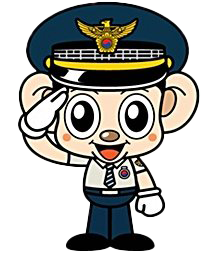
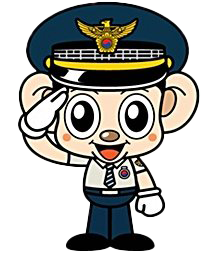
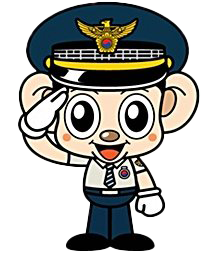
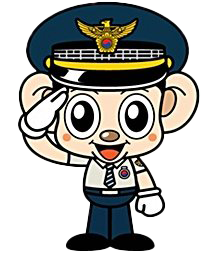
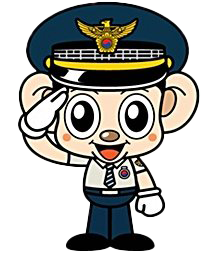
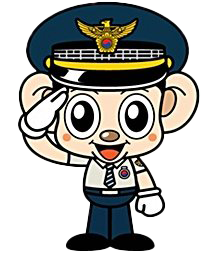
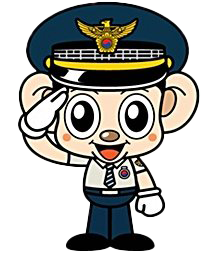
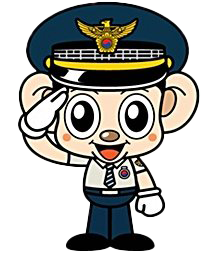
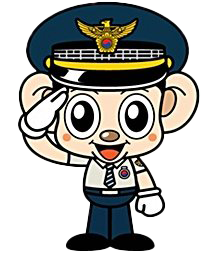
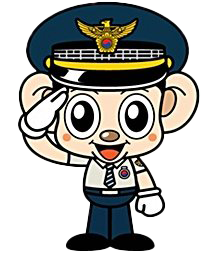
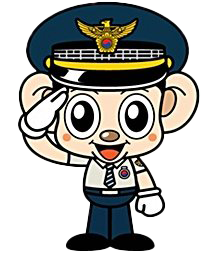
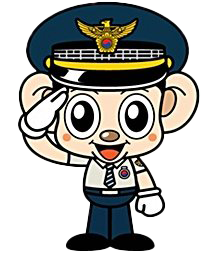
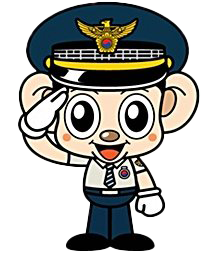
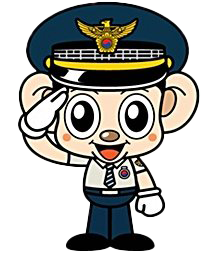
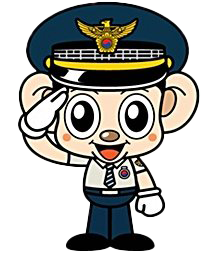
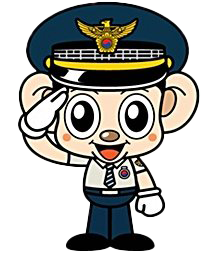
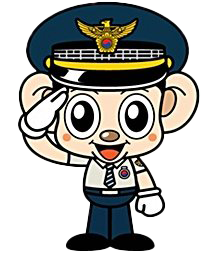
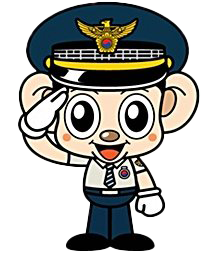
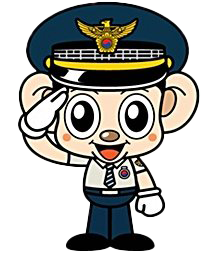
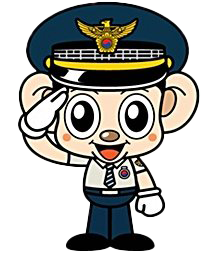
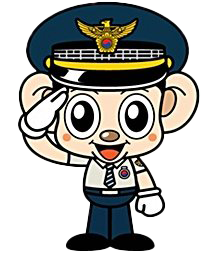
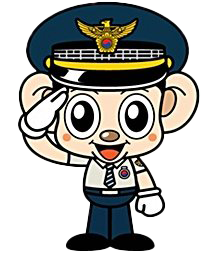
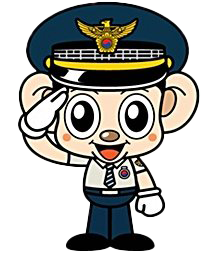
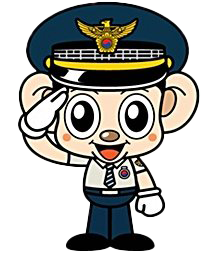
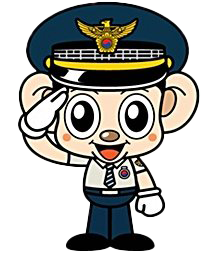
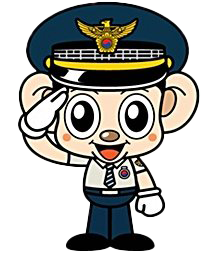
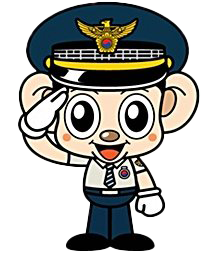
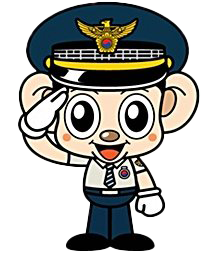

In [25]:
map = folium.Map(location=[df11['위도'].mean(), df11['경도'].mean()], zoom_start=10)

for i in df11.index:
    icon = folium.CustomIcon('data/podol2.png', icon_size=(55, 60))
    folium.Marker(
    location=[df11.위도[i],df11.경도[i]],          # WGS84 좌표계, (latitude,longtitude)
    popup=folium.Popup(df11.주소[i], max_width=200),
    icon=icon,
    tooltip=i
    ).add_to(map)

title_html = "<h3 align='center' style='font-size:20px'>수원남부 소재 주요 경찰서</h3>"
map.get_root().html.add_child(folium.Element(title_html))
map